## anisotropy initial CD95 measurements

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [31]:
def load(fname):
    return np.genfromtxt(fname).reshape((2, 1024))

In [141]:
wdir = r'N:\Singlem\singlem19-2\May\22_CD95_EGFP_calibrations'
IRF = load(path.join(wdir, r'IRF\IRF_1024 ch.dat'))
his_EGFP_thick = load(path.join(wdir, r'his_EGFP_thick\his_EGFP_thick_1024ch.dat'))
point1_membrane = load(path.join(wdir, 'cel1-point1-membrane-120s\cel1-point1-membrane-120s_1-0 ps_1024 ch.dat'))
point2_blob = load(path.join(wdir, 'cel1-point2-blob-120s\cel1-point2-blob_1-0 ps_1024 ch.dat'))
point3_blob = load(path.join(wdir, 'cel1-point3-blob-10s\cel1-point3-blob-10s_1-0 ps_1024 ch.dat'))
point4_membrane = load(path.join(wdir, 'cel1-point4-membrane-10s\cell1_point4_membrane-10s_1-0 ps_1024 ch.dat'))
wdir = r'N:\Singlem\singlem19-2\May\24_EGFP_CD95_NB_NV\traces\chiSurf'
trace_1 = load(path.join(wdir, 'traces_1-0 ps_1024 ch.dat'))
trace_4 = load(path.join(wdir, 'traces_4-0 ps_1024 ch.dat'))
trace_7 = load(path.join(wdir, 'traces_7-0 ps_1024 ch.dat'))
trace_13 = load(path.join(wdir, 'traces_13-0 ps_1024 ch.dat'))

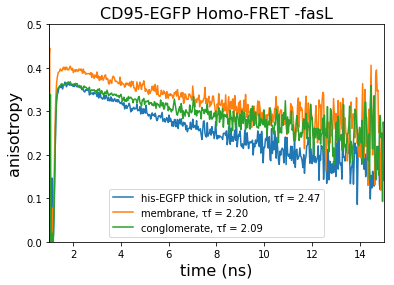

In [190]:
def calcanisotropy(dat, g = 0.93):
    dat = dat - np.average(dat[:,600:800], axis = 1)[:, None]
    return(dat[0] * g - dat[1]) / (dat[0] * g + 2 * dat[1])

membranean = calcanisotropy(point1_membrane)
bloban = calcanisotropy(point2_blob)
refan = calcanisotropy(his_EGFP_thick)
trace_1an = calcanisotropy(trace_1)
xdat = np.arange(1024)*0.032
plt.plot(xdat, refan, label = u'his-EGFP thick in solution, \u03C4f = 2.47')
plt.plot(xdat, membranean, label = u'membrane, \u03C4f = 2.20')
plt.plot(xdat, bloban, label = u'conglomerate, \u03C4f = 2.09')
plt.legend()
plt.ylim(0,0.5)
plt.xlim(1,15)
plt.xlabel('time (ns)', fontsize = 16)
plt.ylabel('anisotropy', fontsize = 16)
plt.title('CD95-EGFP Homo-FRET -fasL', fontsize = 16)
plt.savefig('20190802CD95-HOMO-anisotropy.png', dpi = 300)

In [198]:
wdir = 'K:/vanderVoortN/reports/20190605 STED DFG/poster figures'
np.savetxt(path.join(wdir, 'xdat.txt'), xdat)
np.savetxt(path.join(wdir, 'membranean.txt'), membranean)
np.savetxt(path.join(wdir, 'conglomeratean.txt'), bloban)
np.savetxt(path.join(wdir, 'his_EGFP_thick.txt'), refan)

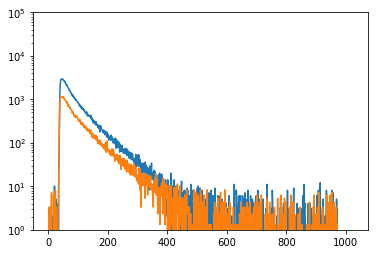

In [143]:
plt.plot(dat[0])
plt.plot(dat[1])
plt.ylim(1,100000)
ax = plt.gca()
ax.set_yscale('log')

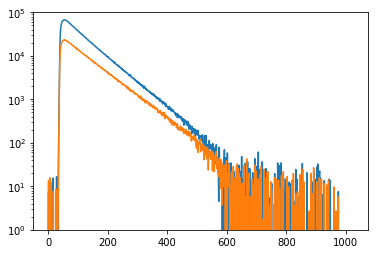

In [105]:
plt.plot(ref[0])
plt.plot(ref[1])
plt.ylim(1,100000)
ax = plt.gca()
ax.set_yscale('log')

## lifetime for cell time series

original chiSURF fits here: N:\Singlem\singlem19-2\May\24_EGFP_CD95_NB_NV\traces\chiSurfFits

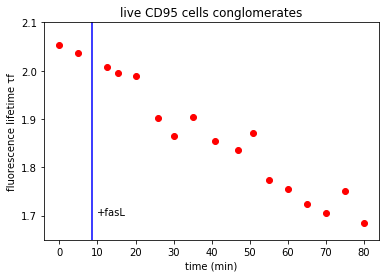

In [191]:
meastime = [0,5,12.5,15.5,20,26,30,35,41,47,51,55,60,65,70,75,80]
lifetimes = [2.053, 2.036, 2.007, 1.995, 1.988, 1.903, 1.865, 1.905, 1.855, 1.835, 1.871, 1.774,
            1.755, 1.725, 1.705, 1.752, 1.685] #tau f lifetimes
plt.plot([8.5, 8.5], [1.65, 2.1], 'b-')
plt.text(10, 1.7, '+fasL')
plt.plot(meastime, lifetimes, 'ro')
plt.xlabel('time (min)')
plt.ylabel('fluorescence lifetime \u03C4f')
plt.title('live CD95 cells conglomerates')
plt.ylim(1.65, 2.10)
plt.savefig('20190802CD95lifetimedecrease.png', dpi = 300)
